<IPython.core.display.Javascript object>


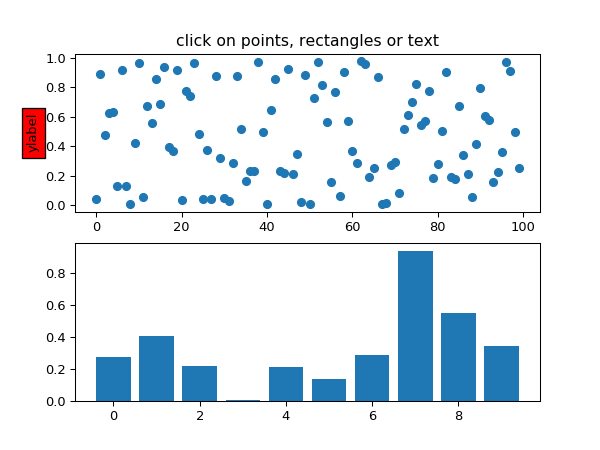

<IPython.core.display.Javascript object>


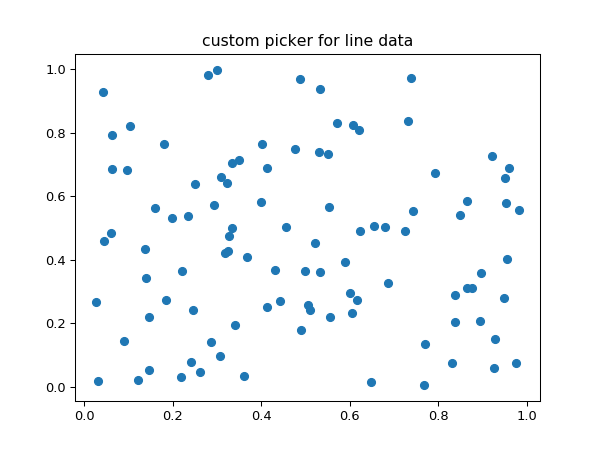

<IPython.core.display.Javascript object>


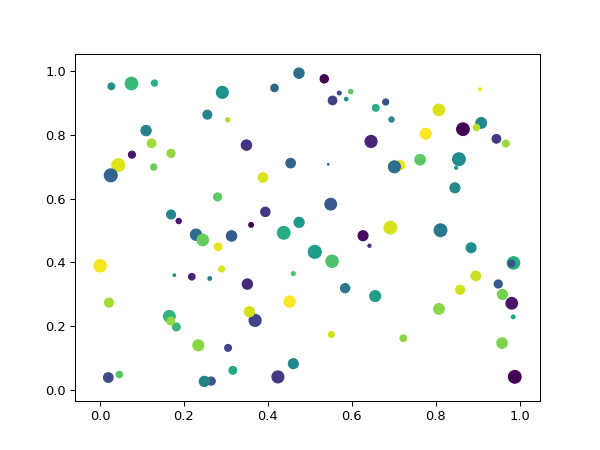

<IPython.core.display.Javascript object>


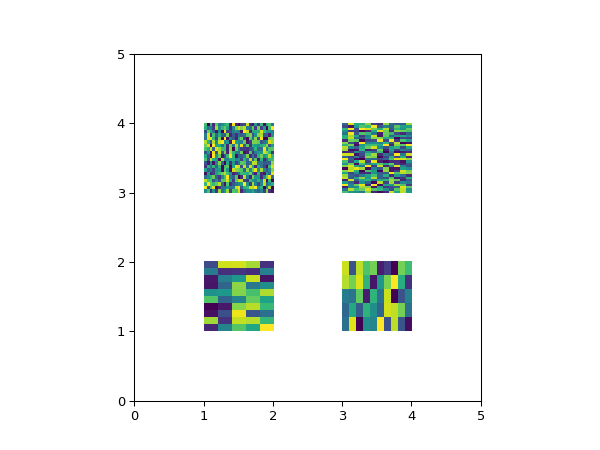

In [3]:
from __future__ import print_function
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle
from matplotlib.text import Text
from matplotlib.image import AxesImage
import numpy as np
from numpy.random import rand
%matplotlib notebook

if 1:  # simple picking, lines, rectangles and text
    fig, (ax1, ax2) = plt.subplots(2, 1)
    ax1.set_title('click on points, rectangles or text', picker=True)
    ax1.set_ylabel('ylabel', picker=True, bbox=dict(facecolor='red'))
    line, = ax1.plot(rand(100), 'o', picker=5)  # 5 points tolerance

    # pick the rectangle
    bars = ax2.bar(range(10), rand(10), picker=True)
    for label in ax2.get_xticklabels():  # make the xtick labels pickable
        label.set_picker(True)

    def onpick1(event):
        if isinstance(event.artist, Line2D):
            thisline = event.artist
            xdata = thisline.get_xdata()
            ydata = thisline.get_ydata()
            ind = event.ind
            print('onpick1 line:', zip(np.take(xdata, ind), np.take(ydata, ind)))
        elif isinstance(event.artist, Rectangle):
            patch = event.artist
            print('onpick1 patch:', patch.get_path())
        elif isinstance(event.artist, Text):
            text = event.artist
            print('onpick1 text:', text.get_text())

    fig.canvas.mpl_connect('pick_event', onpick1)

if 1:  # picking with a custom hit test function
    # you can define custom pickers by setting picker to a callable
    # function.  The function has the signature
    #
    #  hit, props = func(artist, mouseevent)
    #
    # to determine the hit test.  if the mouse event is over the artist,
    # return hit=True and props is a dictionary of
    # properties you want added to the PickEvent attributes

    def line_picker(line, mouseevent):
        """
        find the points within a certain distance from the mouseclick in
        data coords and attach some extra attributes, pickx and picky
        which are the data points that were picked
        """
        if mouseevent.xdata is None:
            return False, dict()
        xdata = line.get_xdata()
        ydata = line.get_ydata()
        maxd = 0.05
        d = np.sqrt((xdata - mouseevent.xdata)**2. + (ydata - mouseevent.ydata)**2.)

        ind = np.nonzero(np.less_equal(d, maxd))
        if len(ind):
            pickx = np.take(xdata, ind)
            picky = np.take(ydata, ind)
            props = dict(ind=ind, pickx=pickx, picky=picky)
            return True, props
        else:
            return False, dict()

    def onpick2(event):
        print('onpick2 line:', event.pickx, event.picky)

    fig, ax = plt.subplots()
    ax.set_title('custom picker for line data')
    line, = ax.plot(rand(100), rand(100), 'o', picker=line_picker)
    fig.canvas.mpl_connect('pick_event', onpick2)


if 1:  # picking on a scatter plot (matplotlib.collections.RegularPolyCollection)

    x, y, c, s = rand(4, 100)

    def onpick3(event):
        ind = event.ind
        print('onpick3 scatter:', ind, np.take(x, ind), np.take(y, ind))

    fig, ax = plt.subplots()
    col = ax.scatter(x, y, 100*s, c, picker=True)
    #fig.savefig('pscoll.eps')
    fig.canvas.mpl_connect('pick_event', onpick3)

if 1:  # picking images (matplotlib.image.AxesImage)
    fig, ax = plt.subplots()
    im1 = ax.imshow(rand(10, 5), extent=(1, 2, 1, 2), picker=True)
    im2 = ax.imshow(rand(5, 10), extent=(3, 4, 1, 2), picker=True)
    im3 = ax.imshow(rand(20, 25), extent=(1, 2, 3, 4), picker=True)
    im4 = ax.imshow(rand(30, 12), extent=(3, 4, 3, 4), picker=True)
    ax.axis([0, 5, 0, 5])

    def onpick4(event):
        artist = event.artist
        if isinstance(artist, AxesImage):
            im = artist
            A = im.get_array()
            print('onpick4 image', A.shape)

    fig.canvas.mpl_connect('pick_event', onpick4)


plt.show()